<center>
<img src="http://www.bigdive.eu/wp-content/uploads/2012/05/logoBIGDIVE-01.png">
</center>

---

# Scikit-Learn: Introduction

## André Panisson


In [1]:
%pylab inline

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sklearn

Scikit-learn is a collection of tools for machine learning written in Python:
[http://scikit-learn.org](http://scikit-learn.org)

## Representation of Data in Scikit-learn

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a
**two-dimensional array or matrix**.  The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.


A classification algorithm, for example, expects the data to be represented as a **feature matrix** and a **label vector**:

$$
{\rm feature~matrix:~~~} {\bf X}~=~\left[
\begin{matrix}
x_{11} & x_{12} & \cdots & x_{1D}\\
x_{21} & x_{22} & \cdots & x_{2D}\\
x_{31} & x_{32} & \cdots & x_{3D}\\
\vdots & \vdots & \ddots & \vdots\\
\vdots & \vdots & \ddots & \vdots\\
x_{N1} & x_{N2} & \cdots & x_{ND}\\
\end{matrix}
\right]
$$

$$
{\rm label~vector:~~~} {\bf y}~=~ [y_1, y_2, y_3, \cdots y_N]
$$

Here there are $N$ samples and $D$ features.

COMMENTO :
x sono i risultati (una feature corrisponde ad una colonna)
y e' l'etichetta della feature (ovvero la colonna)

## A Simple Example: the Iris Dataset

As an example of a simple dataset, we're going to take a look at the
iris data stored by scikit-learn.
The data consists of measurements of three different species of irises.
There are three species of iris in the dataset, which we can picture here:

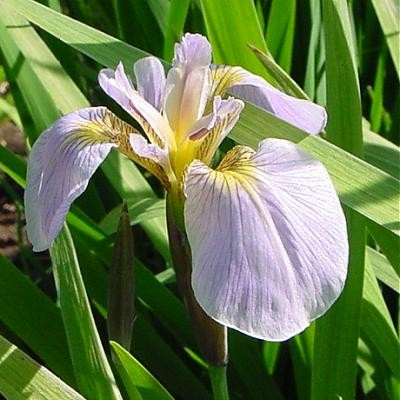

Iris Setosa



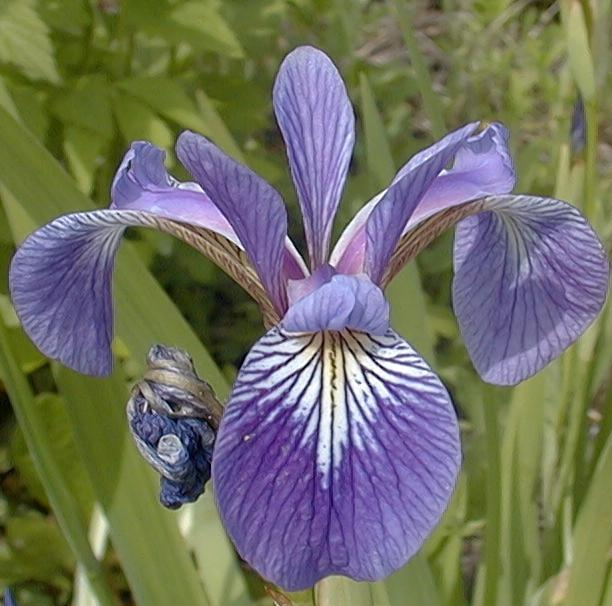

Iris Versicolor



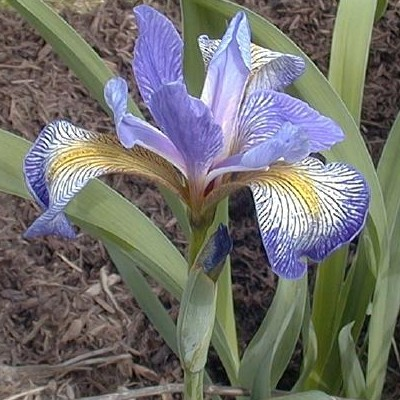

Iris Virginica


In [3]:
from IPython.core.display import Image, display
display(Image('http://mirlab.org/jang/books/dcpr/image/Iris-setosa-10_1.jpg', width=200, height=200))
print "Iris Setosa\n"

display(Image('http://mirlab.org/jang/books/dcpr/image/Iris-versicolor-21_1.jpg', width=200, height=200))
print "Iris Versicolor\n"

display(Image('http://mirlab.org/jang/books/dcpr/image/Iris-virginica-3_1.jpg', width=200, height=200))
print "Iris Virginica"

### Loading the Iris Data with Scikit-Learn

Scikit-learn has a very straightforward set of data on these iris species.  The data consist of
the following:

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica
  
``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [4]:
from sklearn.datasets import load_iris #Packages per creare data set
iris = load_iris()

In [7]:
iris.keys() #e' un dizionario #Data contiene la feature matrix ed target contiene le laber

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [8]:
print iris['DESCR'] 

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [10]:
iris.data.shape #150 sample e 4 features

(150, 4)

In [12]:
n_samples, n_features = iris.data.shape
print (n_samples, n_features)
print iris.data[0] #Stampa le misurazione del primo fiore

(150, 4)
[ 5.1  3.5  1.4  0.2]


In [13]:
print iris.data.shape
print iris.target.shape

(150, 4)
(150,)


In [14]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [15]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

This data is four dimensional, but we can visualize two of the dimensions
at a time using a simple scatter-plot:

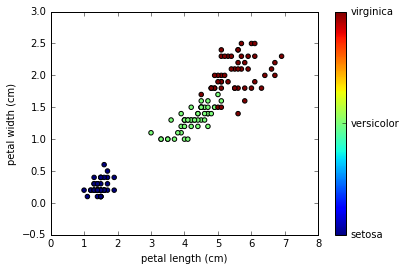

In [16]:
import numpy as np
import matplotlib.pyplot as plt

x_index = 2
y_index = 3

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

In [18]:
import seaborn as sns #libreria che permette di creare lo scatter plot di utte le features

ImportError: No module named seaborn

In [19]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = pd.Series(iris.target).map(lambda c: iris.target_names[c])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
g = sns.PairGrid(iris_df, hue='target')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

NameError: name 'sns' is not defined

## Other Available Data
They come in three flavors:

- **Packaged Data:** these small datasets are packaged with the scikit-learn installation,
  and can be downloaded using the tools in ``sklearn.datasets.load_*``
- **Downloadable Data:** these larger datasets are available for download, and scikit-learn
  includes tools which streamline this process.  These tools can be found in
  ``sklearn.datasets.fetch_*``
- **Generated Data:** there are several datasets which are generated from models based on a
  random seed.  These are available in the ``sklearn.datasets.make_*``

In [21]:
from sklearn import datasets

In [25]:
datasets.make_moons(n_samples=10) #crea dei dati per testare i modelli

(array([[  1.70710678e+00,  -2.07106781e-01],
        [  7.07106781e-01,   7.07106781e-01],
        [  1.00000000e+00,   0.00000000e+00],
        [ -7.07106781e-01,   7.07106781e-01],
        [  2.00000000e+00,   5.00000000e-01],
        [  6.12323400e-17,   1.00000000e+00],
        [  1.00000000e+00,  -5.00000000e-01],
        [ -1.00000000e+00,   1.22464680e-16],
        [  0.00000000e+00,   5.00000000e-01],
        [  2.92893219e-01,  -2.07106781e-01]]),
 array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1]))

**Digits Dataset**: This dataset is composed of 1797 images of $8 \times 8$ pixels. You have to transform it in a matrix of 1797 samples and 64 features ($1797 \times 64$).

In [26]:
digits = datasets.load_digits() #dataset con delle immagini di numeri scritti a mano

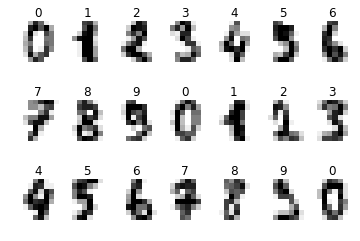

In [27]:
# plot the first 21 samples
for index, (image, label) in enumerate(zip(digits.images, digits.target)[:21]):
    plt.subplot(3, 7, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)

### The Scikit-learn Estimator Object

Every algorithm is exposed in scikit-learn via an ''Estimator'' object. For instance a linear regression is implemented as so:

In [28]:
from sklearn.linear_model import LinearRegression #tutti i modelli di learning si chiamano estimators

**Estimator parameters**: All the parameters of an estimator can be set when it is instantiated, and have suitable default values:

In [29]:
model = LinearRegression(normalize=True, fit_intercept=False)
print model.normalize
print model

True
LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=True)


In [30]:
#COMMENTO
#model.fit() # model.fit  mi prova e parametri e mi trova la funzione modello
#dopo avere fatto il fit faro la funzione
#model.predict() #in x mette il test set

**Estimated Model parameters**: When data is *fit* with an estimator, parameters are estimated from the data at hand. All the estimated parameters are attributes of the estimator object ending by an underscore:

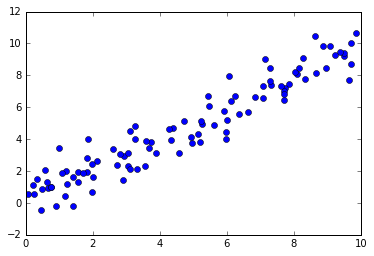

In [31]:
np.random.seed(42)
x = np.random.rand(100)*10
y = x + np.random.randn(x.shape[0])

plt.plot(x, y, 'o');

In [33]:
# The input data for sklearn is 2D: (samples == 3 x features == 1)
X = x[:, np.newaxis] #trasforma la x da vettore in matrice

In [37]:
x.shape #vettore di 100 elementi

(100,)

In [35]:
X.shape #matrice 100 righe una colonna

(100, 1)

In [38]:
model.fit(X, y) 
print model.coef_
print model.intercept_

[ 0.98678556]
0.0


In [41]:
model.predict([[3],[100],[1]]) # il risultato dell'applicazione del modello ai valori passati

array([  2.96035669,  98.67855618,   0.98678556])

## Illustration of the Bias-Variance Tradeoff with Scikit-Learn

For this section, we'll work with a simple 1D regression problem.  This will help us to
easily visualize the data and the model, and the results generalize easily to  higher-dimensional
datasets.  We'll explore a simple **linear regression** problem.
This can be accomplished within scikit-learn with the `sklearn.linear_model` module.

We'll create a simple nonlinear function that we'd like to fit

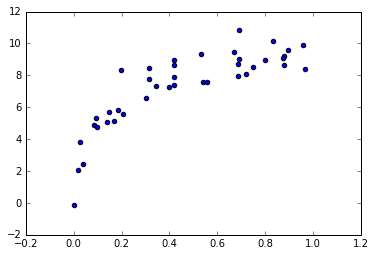

In [42]:
def f(x, err=0.5):
    y = 10 - 1. / (x + 0.1)
    if err > 0:
        y = np.random.normal(y, err)
    return y

def make_data(N=40, error=1.0, random_seed=1):
    # randomly sample the data
    np.random.seed(random_seed)
    X = np.random.random(N)[:, np.newaxis]
    y = f(X.ravel(), error)
    
    return X, y

X, y = make_data(40, error=1)
plt.scatter(X.ravel(), y)

In [46]:
from sklearn import metrics #pacchetto che ha le misure di errore e di score Lo score che si usa normalmentee' R2 per la regressione linearee
from sklearn.linear_model import LinearRegression
#anche importante e' la precision e la auc

In [47]:
X_test, y_test = make_data(400, error=1.0, random_seed=2) #creiamo un data set di 400 punti

In [50]:
N = 40
print(X[:N])

[[  4.17022005e-01]
 [  7.20324493e-01]
 [  1.14374817e-04]
 [  3.02332573e-01]
 [  1.46755891e-01]
 [  9.23385948e-02]
 [  1.86260211e-01]
 [  3.45560727e-01]
 [  3.96767474e-01]
 [  5.38816734e-01]
 [  4.19194514e-01]
 [  6.85219500e-01]
 [  2.04452250e-01]
 [  8.78117436e-01]
 [  2.73875932e-02]
 [  6.70467510e-01]
 [  4.17304802e-01]
 [  5.58689828e-01]
 [  1.40386939e-01]
 [  1.98101489e-01]
 [  8.00744569e-01]
 [  9.68261576e-01]
 [  3.13424178e-01]
 [  6.92322616e-01]
 [  8.76389152e-01]
 [  8.94606664e-01]
 [  8.50442114e-02]
 [  3.90547832e-02]
 [  1.69830420e-01]
 [  8.78142503e-01]
 [  9.83468338e-02]
 [  4.21107625e-01]
 [  9.57889530e-01]
 [  5.33165285e-01]
 [  6.91877114e-01]
 [  3.15515631e-01]
 [  6.86500928e-01]
 [  8.34625672e-01]
 [  1.82882773e-02]
 [  7.50144315e-01]]


in-sample mean squared error: 1.78514645061
out-of-sample mean squared error: 2.18540465342


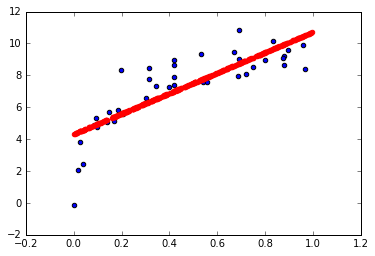

In [51]:
N = 40
X_train = X[:N]
y_train = y[:N]

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.scatter(X_train.ravel(), y_train)
plt.scatter(X_test.ravel(), y_pred, color='r')
print "in-sample mean squared error:", metrics.mean_squared_error(model.predict(X_train), y_train)
print "out-of-sample mean squared error:", metrics.mean_squared_error(model.predict(X_test), y_test)

We have fit a straight line to the data, but clearly this model is not a good choice.  We say that this model is **biased**, or that it **under-fits** the data.

Let's try to improve this by creating a more complicated model.  We can do this by adding degrees of freedom, and computing a polynomial regression over the inputs.  Let's make this easier by creating a quick PolynomialRegression estimator:

In [57]:
class PolynomialRegression(LinearRegression):
    """Simple Polynomial Regression to 1D data"""
    def __init__(self, degree=1, **kwargs):
        self.degree = degree
        LinearRegression.__init__(self, **kwargs)
        
    def fit(self, X, y): #prende il dataset fa un trasformazione non lineare per decidere il modello da prendere
        if X.shape[1] != 1:
            raise ValueError("Only 1D data valid here")
        Xp = X ** (1 + np.arange(self.degree))
        return LinearRegression.fit(self, Xp, y)
        
    def predict(self, X):
        Xp = X ** (1 + np.arange(self.degree))
        return LinearRegression.predict(self, Xp)

In [58]:
N = 20
X_train = X[:N]
y_train = y[:N]

in-sample mean squared error: 1.10625859691
out-of-sample mean squared error: 1.50353263789


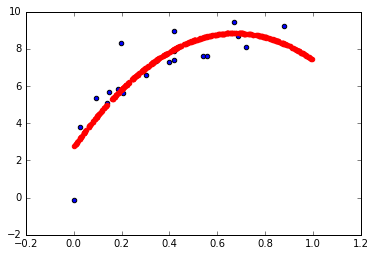

In [59]:
model = PolynomialRegression(degree=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.scatter(X_train.ravel(), y_train)
plt.scatter(X_test.ravel(), y_pred, color='r')
print "in-sample mean squared error:", metrics.mean_squared_error(model.predict(X_train), y_train)
print "out-of-sample mean squared error:", metrics.mean_squared_error(model.predict(X_test), y_test)

## Learning Curves: Number of Training Samples

Let's check the values of $E_{in}$ and $E_{out}$ for different values of $N$, with a simple model with degree 2:

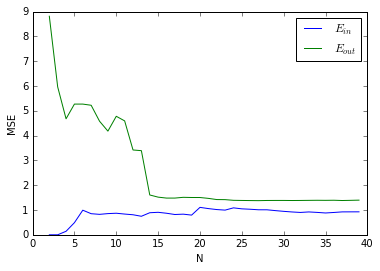

In [60]:
model = PolynomialRegression(degree=2)

np.random.seed(42)

training_error = []
test_error = []
mse = metrics.mean_squared_error

N_list = range(2, 40)

for N in N_list:
    X_train = X[:N]
    y_train = y[:N]
    
    model.fit(X_train, y_train)
    training_error.append(mse(model.predict(X_train), y_train))
    test_error.append(mse(model.predict(X_test), y_test))
    
plt.plot(N_list, training_error, label='$E_{in}$')
plt.plot(N_list, test_error, label='$E_{out}$')
plt.legend()
plt.xlabel('N')
plt.ylabel('MSE');

Increasing the degree to 3, we add one more parameter and have a more complex model.

## Exercise:

Create a Polynomical Regression model with degree 3.

Plot the learning curves with values of $E_{in}$ and $E_{out}$ for different values of $N$.

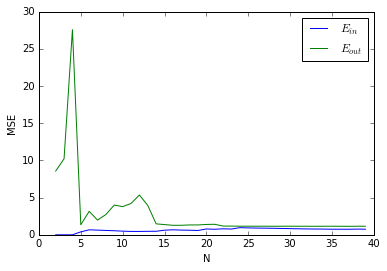

In [62]:
model = PolynomialRegression(degree=3) #degree si chiama iperparametro

np.random.seed(42)

training_error = []
test_error = []
mse = metrics.mean_squared_error

N_list = range(2, 40)

for N in N_list:
    X_train = X[:N]
    y_train = y[:N]
    
    model.fit(X_train, y_train)
    training_error.append(mse(model.predict(X_train), y_train))
    test_error.append(mse(model.predict(X_test), y_test))
    
plt.plot(N_list, training_error, label='$E_{in}$')
plt.plot(N_list, test_error, label='$E_{out}$')
plt.legend()
plt.xlabel('N')
plt.ylabel('MSE');

Compare $E_{in}$ and $E_{out}$ to the Polynomial Regression with degree 2. Which model would you choose for $N=30$?

Repeat the analysis with a Polynomical Regression model with degree 10.

In [ ]:
X_test, y_test = make_data(400, error=1.0, random_seed=2)

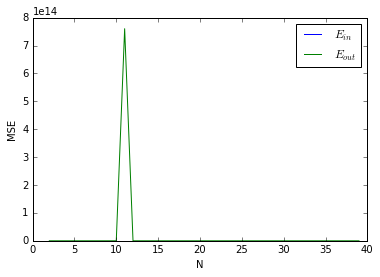

In [68]:
model = PolynomialRegression(degree=10)

np.random.seed(41)

training_error = []
test_error = []
mse = metrics.mean_squared_error

N_list = range(2, 40)

for N in N_list:
    X_train = X[:N]
    y_train = y[:N]
    
    model.fit(X_train, y_train)
    training_error.append(mse(model.predict(X_train), y_train))
    test_error.append(mse(model.predict(X_test), y_test))
    
plt.plot(N_list, training_error, label='$E_{in}$')
plt.plot(N_list, test_error, label='$E_{out}$')
plt.legend()
plt.xlabel('N')
plt.ylabel('MSE');

## Learning Curves: Model Complexity

Another type of learning curve is shown below.

We have a fixed number of training samples N (e.g., 20). We plot the values of $E_{in}$ and $E_{out}$ for different levels of model complexity:

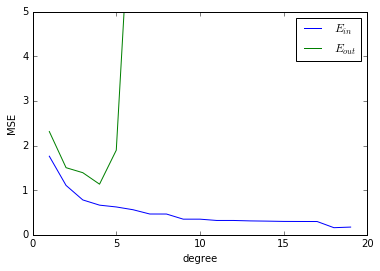

In [69]:
N = 20
X_train = X[:N]
y_train = y[:N]

degrees = np.arange(1, 20)

training_error = []
test_error = []
mse = metrics.mean_squared_error

for d in degrees:
    model = PolynomialRegression(d).fit(X_train, y_train)
    training_error.append(mse(model.predict(X_train), y_train))
    test_error.append(mse(model.predict(X_test), y_test))
    
plt.plot(degrees, training_error, label='$E_{in}$')
plt.plot(degrees, test_error, label='$E_{out}$')
plt.legend()
plt.xlabel('degree')
plt.ylabel('MSE')
plt.ylim(0, 5);

## Exercise:

Increase the number of training samples (e.g., 40) and plot the values of $E_{in}$ and $E_{out}$ for different levels of model complexity.

Would you choose the same model complexity as if it was just 20 training samples?

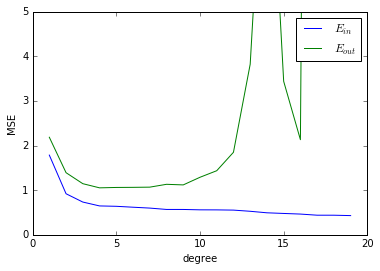

In [71]:
N = 40
X_train = X[:N]
y_train = y[:N]

degrees = np.arange(1, 20)

training_error = []
test_error = []
mse = metrics.mean_squared_error

for d in degrees:
    model = PolynomialRegression(d).fit(X_train, y_train)
    training_error.append(mse(model.predict(X_train), y_train))
    test_error.append(mse(model.predict(X_test), y_test))
    
plt.plot(degrees, training_error, label='$E_{in}$')
plt.plot(degrees, test_error, label='$E_{out}$')
plt.legend()
plt.xlabel('degree')
plt.ylabel('MSE')
plt.ylim(0, 5);

## From RMSE to Coefficient of Determination

In Sklearn, most of the times we will be interested in the **score** of the model, not in the error.

An example of model score to evaluate a linear regression is the $R^2$ (coefficient of determination):

$$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=0}^{n_{\text{samples}} - 1} (y_i - \hat{y}_i)^2}{\sum_{i=0}^{n_\text{samples} - 1} (y_i - \bar{y})^2}$$

where $\bar{y} =  \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}} - 1} y_i$.

The best possible score is 1.0, lower values are worse.

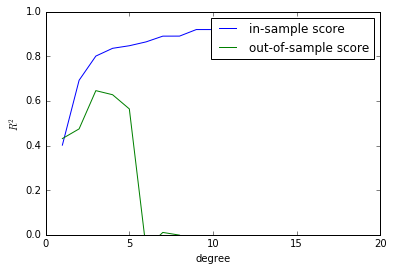

In [73]:
N = 20
X_train = X[:N]
y_train = y[:N]

degrees = np.arange(1, 20)

training_scores = []
test_scores = []
r2 = metrics.r2_score #R2 coefficente lineare

for d in degrees:
    model = PolynomialRegression(d).fit(X_train, y_train)
    training_scores.append(r2(model.predict(X_train), y_train))
    test_scores.append(r2(model.predict(X_test), y_test))

plt.plot(degrees, training_scores, label='in-sample score')
plt.plot(degrees, test_scores, label='out-of-sample score')
plt.legend()
plt.xlabel('degree')
plt.ylabel('$R^2$')
plt.ylim(0, 1.0);

## Exercise:

Check the performance of different models in terms of Coefficient of Determination with 40 training samples.

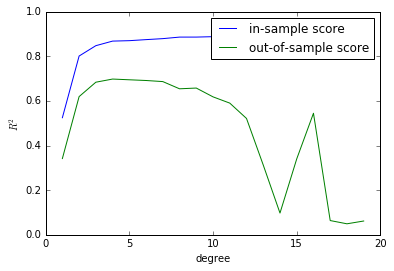

In [74]:
N = 40
X_train = X[:N]
y_train = y[:N]

degrees = np.arange(1, 20)

training_scores = []
test_scores = []
r2 = metrics.r2_score #R2 coefficente lineare

for d in degrees:
    model = PolynomialRegression(d).fit(X_train, y_train)
    training_scores.append(r2(model.predict(X_train), y_train))
    test_scores.append(r2(model.predict(X_test), y_test))

plt.plot(degrees, training_scores, label='in-sample score')
plt.plot(degrees, test_scores, label='out-of-sample score')
plt.legend()
plt.xlabel('degree')
plt.ylabel('$R^2$')
plt.ylim(0, 1.0);

# Model validation



### Cross validation

Cross-validation (CV) is a model validation technique for assessing how the results of a model will generalize to an independent data set (i.e., it is used to estimate the value of $E_{out}$).

In the basic CV approach, called *k*-fold CV,
the training set is split into *k* smaller sets.
The following procedure is followed for each of the *k* "folds":

 * A model is trained using $k-1$ of the folds as training data;
 * the resulting model is validated on the remaining part of the data
   (i.e., it is used as a test set to compute a performance measure
   such as accuracy).

The performance measure reported by *k*-fold cross-validation
is then the average of the values computed in the loop.
This approach can be computationally expensive,
but does not waste too much data
(as it is the case when fixing an arbitrary test set)

In [75]:
from sklearn import cross_validation

In [76]:
model = PolynomialRegression(5)

np.mean(cross_validation.cross_val_score(model, X_train, y_train, cv=10)) #numero consigliato per il fold e' 10

0.088509084183955949

In [78]:
model = PolynomialRegression(5)

cross_validation.cross_val_score(model, X_train, y_train, cv=10) #in questo caso la varianza e' alto non va bene

array([ 0.87074139,  0.53432691, -0.85621234,  0.77655671,  0.19792195,
       -0.45826838,  0.9822391 ,  0.80760455, -2.89635763,  0.92653857])

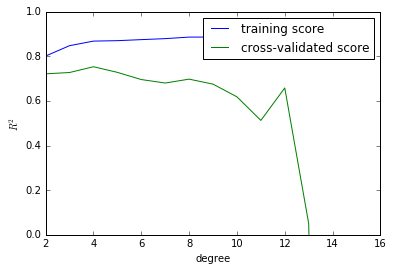

In [79]:
N = 40
X_train = X[:N]
y_train = y[:N]

degrees = np.arange(2, 16)

training_scores = []
test_scores = []
r2 = metrics.r2_score

for d in degrees:
    model = PolynomialRegression(d).fit(X_train, y_train)
    training_scores.append(r2(model.predict(X_train), y_train))
    
    scores = cross_validation.cross_val_score(model, X_train, y_train, cv=5)
    test_scores.append(np.mean(scores))

# note that the test error can also be computed via cross-validation
plt.plot(degrees, training_scores, label='training score')
plt.plot(degrees, test_scores, label='cross-validated score')
plt.legend()
plt.xlabel('degree')
plt.ylabel('$R^2$')
plt.ylim(0.0, 1.0);

## Exercise:

Use numpy to select the hyperparameter (polynomial degree) that gives the best cross-validated score.

In [81]:
degrees[np.array(test_scores).argmax()]

4

## Regularization

With regularization, we add constraints to the model, by limiting the space of the parameter values.

For example, with L1 regularization, we add a term to the error function:
$$\alpha \sum_{d=0}^D {w_d}$$
With L2 regularization, we add this term:
$$\alpha \sum_{d=0}^D {w_d^2} $$
For example, the error function of Linear Regression with L1 regularization becomes
$$ \frac{1}{N} \sum_{i=1}^N {\left( \mathbf{w}x_i - y_i \right)} + \alpha \sum_{d=0}^D {w_d} $$
With regularization, we are not free to change all parameters independently: If we set one parameter to a high value, we implicitly force other parameters to be smaller. The degrees of freedom thus are smaller than without the restriction. As result, we are reducing the effective parameters (or VC dimension).

In [84]:
from sklearn.linear_model import Lasso #E' una regressione lineare con regolarizzazione L1

class RegularizedPolynomialRegression(Lasso):
    """Simple Polynomial Regression to 1D data"""
    def __init__(self, degree=1, alpha=1.0, **kwargs):
        self.degree = degree
        self.alpha = alpha
        Lasso.__init__(self, alpha=alpha, **kwargs)
        
    def fit(self, X, y):
        if X.shape[1] != 1:
            raise ValueError("Only 1D data valid here")
        Xp = X ** (1 + np.arange(self.degree))
        return Lasso.fit(self, Xp, y)
        
    def predict(self, X):
        Xp = X ** (1 + np.arange(self.degree))
        return Lasso.predict(self, Xp)

/home/bigdive/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


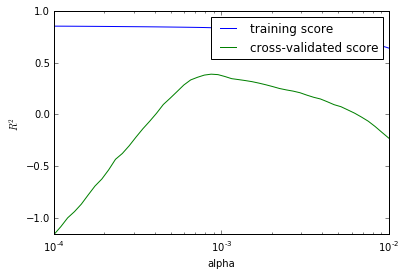

In [83]:
X_train, y_train = make_data(30, error=1)

degree = 1000
alphas = np.logspace(-4, -2, 50)

training_scores = []
test_scores = []
r2 = metrics.r2_score

for alpha in alphas:
    model = RegularizedPolynomialRegression(degree, alpha=alpha).fit(X_train, y_train)
    training_scores.append(r2(model.predict(X_train), y_train))
    
    scores = cross_validation.cross_val_score(model, X_train, y_train, cv=5)
    test_scores.append(np.mean(scores))

# note that the test error can also be computed via cross-validation
plt.plot(alphas, training_scores, label='training score')
plt.plot(alphas, test_scores, label='cross-validated score')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('$R^2$')
plt.xscale('log')
plt.ylim(np.min(test_scores), 1.);

In [85]:
model.coef_

array([ 16.97579541, -13.05864562,  -0.        ,  -0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   2.20420076,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.  

## Exercise:

Use numpy to select the hyperparameter (alpha) that gives the best cross-validated score.

Then plot the test points with their true values and their predicted values.

In [ ]:
# YOUR CODE HERE

## Hyperparameter search and model selection

### Grid Search

The grid search provided by **GridSearchCV** exhaustively generates candidates from a grid of parameter values specified with the `param_grid` parameter.

The GridSearchCV implements the usual estimator API: when “fitting” it on a dataset all the possible combinations of parameter values are evaluated and the best combination is retained.

In [87]:
from sklearn import grid_search

In [88]:
N = 40
X_train = X[:N]
y_train = y[:N]

degrees = np.arange(2, 16)

model = PolynomialRegression(2)

param_grid = {"degree": degrees}
gs = grid_search.GridSearchCV(model, param_grid)
gs.fit(X_train, y_train)
gs.best_params_

{'degree': 4}

In [89]:
gs #modello creato

GridSearchCV(cv=None, error_score='raise',
       estimator=PolynomialRegression(degree=2), fit_params={}, iid=True,
       n_jobs=1,
       param_grid={'degree': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [90]:
gs.grid_scores_

[mean: 0.77304, std: 0.08731, params: {'degree': 2},
 mean: 0.77653, std: 0.13123, params: {'degree': 3},
 mean: 0.79132, std: 0.09457, params: {'degree': 4},
 mean: 0.78096, std: 0.09964, params: {'degree': 5},
 mean: 0.76666, std: 0.10328, params: {'degree': 6},
 mean: 0.75140, std: 0.10455, params: {'degree': 7},
 mean: 0.74708, std: 0.12517, params: {'degree': 8},
 mean: 0.73101, std: 0.15367, params: {'degree': 9},
 mean: 0.61400, std: 0.30030, params: {'degree': 10},
 mean: 0.36746, std: 0.64250, params: {'degree': 11},
 mean: 0.44525, std: 0.48870, params: {'degree': 12},
 mean: -12.56185, std: 18.46224, params: {'degree': 13},
 mean: -1.21409, std: 2.29874, params: {'degree': 14},
 mean: -62.16382, std: 71.25054, params: {'degree': 15}]